In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### 1. Dataset
Load the prostate dataset. 

In [2]:
#DONE 
train = pd.read_csv('data/prostate_train.csv') 
test = pd.read_csv('data/prostate_test.csv') 

We will use the target $y=$lpsa throughout this exercise, and all other features as predictors $X$, so split the train and test sets by $X,y$.

In [3]:
#DONE
Xtrain, ytrain = train.loc[:, ~train.columns.isin(['lpsa'])], train.lpsa
Xtest, ytest = test.loc[:, ~test.columns.isin(['lpsa'])], test.lpsa
# Convert into array
Xtrain, ytrain = np.array(Xtrain), np.array(ytrain)
Xtest, ytest = np.array(Xtest), np.array(ytest)                

### 2. Ridge Regression
Perform Ridge regression with target lpsa and all other features as predictors. Do so for different regularization parameters $\lambda$.
Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.238, Fig. 6.4.

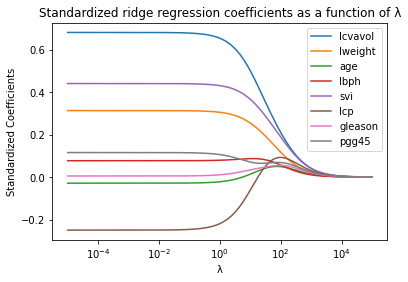

In [4]:
from sklearn.linear_model import Ridge  
    
# This is an example of possible values for the lambda that you can consider.
lambdas = np.logspace(-5, 5, 200)

#DONE
coefs = []
for l in lambdas:
    ridge_model = Ridge(alpha=l)
    ridge_model.fit(Xtrain, ytrain)
    coefs.append(ridge_model.coef_)
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.legend(['lcvavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'])
ax.set_xscale('log') #zoom the plot
plt.xlabel('\u03BB')
plt.ylabel('Standardized Coefficients')
plt.title('Standardized ridge regression coefficients as a function of \u03BB')
plt.show()

*Problem 4.2*
The coefficcients in ridge regression shrink towards 0 only when lambda increases to a very high number and approaches infinity.

### 3. Cross Validation & Ridge
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ for the ridge regression model.

In [5]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV

# K-fold cross validation
folds = 10
kfold_cv = KFold(n_splits=folds)

#DONE
ridgeCV_model = RidgeCV(alphas=lambdas, cv=kfold_cv)
ridgeCV_model.fit(Xtrain, ytrain)
optRidgeLambda = ridgeCV_model.alpha_
print('The optimal value for \u03BB for the ridge regression model is ' + str(optRidgeLambda))

The optimal value for λ for the ridge regression model is 615.0985788580505


Report train and test error measured in MSE for this $\lambda$.

In [6]:
from sklearn.metrics import mean_squared_error
opt_ridge_model = Ridge(alpha=optRidgeLambda)
opt_ridge_model.fit(Xtrain, ytrain)

ridgeTrainMSE = mean_squared_error(ytrain, opt_ridge_model.predict(Xtrain))
ridgeTestMSE = mean_squared_error(ytest, opt_ridge_model.predict(Xtest))
print('The average train MSE for this \u03BB is ' + str(ridgeTrainMSE))
print('The average test MSE for this \u03BB is ' + str(ridgeTestMSE))

The average train MSE for this λ is 1.0216203515632445
The average test MSE for this λ is 1.0346232897307546


In [7]:
print(opt_ridge_model.coef_)

[0.06222952 0.03210401 0.02134324 0.01616416 0.06058645 0.04416006
 0.02928354 0.03460691]


### 4. Lasso Regression
Perform Lasso regression with target lpsa and all other features as predictors. Do so for different parameters $\lambda$.

Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.242, Fig. 6.6.

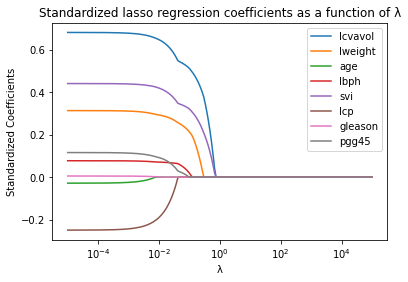

In [8]:
from sklearn.linear_model import Lasso

#DONE
coefs = []
for l in lambdas:
    lasso_model = Lasso(alpha=l)
    lasso_model.fit(Xtrain, ytrain)
    coefs.append(lasso_model.coef_)
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.legend(['lcvavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'])
ax.set_xscale('log') #zoom the plot
plt.xlabel('\u03BB')
plt.ylabel('Standardized Coefficients')
plt.title('Standardized lasso regression coefficients as a function of \u03BB')
plt.show()

*Problem 4.4*
* The Lasso regression generates a sparse model compare to ridge regression
* The coefficcients in the Lasso regression shrink exactly to 0 at lower value than ridge regression.

## 5. Cross Validation & Lasso
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ in the Lasso.
		Report train and test error measured in MSE for this $\lambda$. 

In [9]:
from sklearn.linear_model import LassoCV

lassoCV_model = LassoCV(alphas=lambdas, cv=kfold_cv)
lassoCV_model.fit(Xtrain, ytrain)
optLassoLambda = lassoCV_model.alpha_
print('The optimal value for \u03BB for the Lasso regression model is ' + str(optLassoLambda))

The optimal value for λ for the Lasso regression model is 0.018464249428955443


In [10]:
opt_lasso_model = Lasso(alpha=optLassoLambda)
opt_lasso_model.fit(Xtrain, ytrain)

lassoTrainMSE = mean_squared_error(ytrain, opt_lasso_model.predict(Xtrain))
lassoTestMSE = mean_squared_error(ytest, opt_lasso_model.predict(Xtest))
print('The average train MSE for this \u03BB is ' + str(lassoTrainMSE))
print('The average test MSE for this \u03BB is ' + str(lassoTestMSE))

The average train MSE for this λ is 0.4795093809045241
The average test MSE for this λ is 0.45097015381398525


How many and which features are used?
		Compare this to the coefficients determined for ridge regression in part 3 of this exercise.

In [11]:
print(opt_lasso_model.coef_)

[ 0.62109085  0.2829691   0.          0.06884726  0.40018445 -0.14017368
  0.          0.07594088]


*Problem 4.5*
* 6 features are used: lcavol, lweight, lbph, svi, lcp, pgg45. Since the absolute value of these features' coefficents are greater than 0.
* Ridge regression shrinks the coefficients towards zero, but it doesn’t set any coefficients to zero like the Lasso. Therefore, it does not automatically select features.

## 6. 

Compare the performance, in terms of MSE, of the best models in parts 3. and 5. Which model would you choose and why? What alternative model could have been used?

*Problem 4.6*
* The Lasso regression has better performance than ridge regression (train MSE: 0.48 vs 1.02; test MSE: 0.45 vs 1.03). Therefore, we would choose the Lasso model in this case. 
* Akaike information criterion (AIC) or Bayesian information criterion (BIC) could have been used here.